# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_theme(style='darkgrid')

# Carregando dados

In [2]:
dados = pd.read_csv('Job_Frauds.csv',encoding='iso-8859-1')

# Informação dos dados

In [3]:
dados.head(3)

,Job Title,Job Location,Department,Range_of_Salary,Profile,Job_Description,Requirements,Job_Benefits,Telecomunication,Comnpany_Logo,Type_of_Employment,Experience,Qualification,Type_of_Industry,Operations,Fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,NaN,NaN,NaN,NaN,NaN,0


In [3]:
print('Linhas: {}'.format(dados.shape[0]))
print('Colunas: {}'.format(dados.shape[1]))
print('Dados duplicados: {}'.format(dados.duplicated().sum()))
tabela = pd.DataFrame({
    'ValUni':dados.nunique(),
    'ValNull':dados.isnull().sum(),
    'ValPercentNull':dados.isnull().sum()/len(dados),
    'ValType':dados.dtypes.values
})
tabela

Linhas: 17880
Colunas: 16
Dados duplicados: 288


,ValUni,ValNull,ValPercentNull,ValType
Job Title,11231,0,0.000000,object
Job Location,3105,346,0.019351,object
Department,1337,11547,0.645805,object
Range_of_Salary,874,15012,0.839597,object
Profile,1709,3308,0.185011,object
Job_Description,14801,1,0.000056,object
Requirements,11964,2695,0.150727,object
Job_Benefits,6194,7210,0.403244,object
Telecomunication,2,0,0.000000,int64
Comnpany_Logo,2,0,0.000000,int64


In [7]:
values = dados.isnull().sum()
labels = dados.isnull().sum().index

fig = px.pie(dados, values=values, names=labels, color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title_text='Porcentagem de valores nulos nos dados')
fig.show()

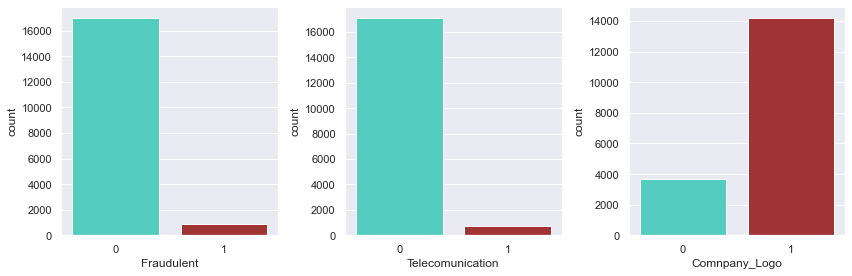

In [4]:
colors = ['#40e0d0', '#b22222']
fig, axes = plt.subplots(1,3,figsize=(12,4))

sns.countplot(x='Fraudulent', data=dados, ax=axes[0], palette=colors)
sns.countplot(x='Telecomunication', data=dados, ax=axes[1], palette=colors)
sns.countplot(x='Comnpany_Logo', data=dados, ax=axes[2], palette=colors)

plt.tight_layout()
plt.show()

- Vemos que temos duas colunas booleanas (0=False, 1=True)
- Temos mais dados Nulos na coluna Range_of_Salary, representando 83% vazios
- Boa parte das colunas tem valores Categóricas, podendo ser feito o pré processamento para os texto.
- Vemos que as colunas Fraudulent e Telecomunication estão desequilibradas, tem quase a mesma proporção
- A coluna da Logo_Companhia tem sinal de ser estavel de ser Fraudulenta

In [3]:
dados.drop_duplicates(inplace=True)

In [20]:
print(dados['Fraudulent'].value_counts(),'\n')
print(dados['Telecomunication'].value_counts(),'\n')

0    17014
1      866
Name: Fraudulent, dtype: int64 

0    17113
1      767
Name: Telecomunication, dtype: int64 



# Visualização Gráfica

- Veremos aqui abaixo, a visualização gráfica das colunas

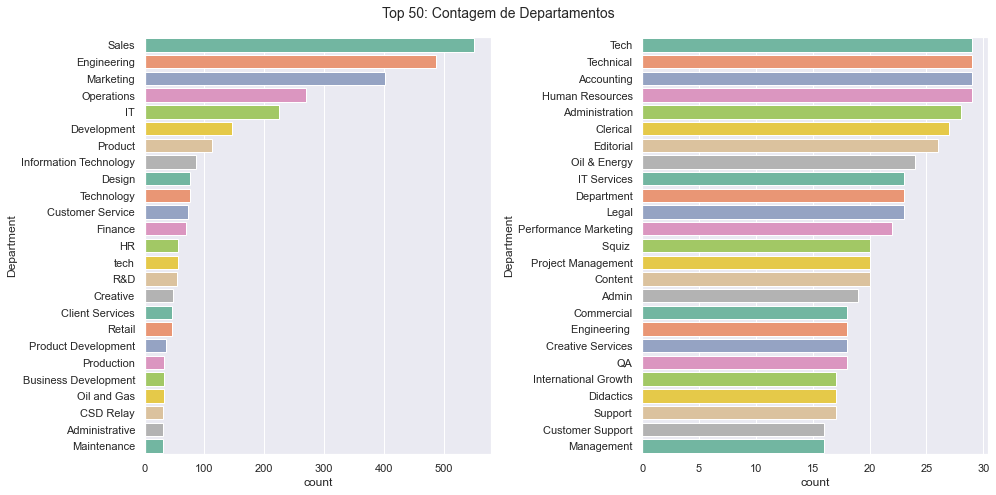

In [5]:
# Colunas por parte
## coluna departamento
fig, axes = plt.subplots(1,2,figsize=(14,7))
plt.suptitle('Top 50: Contagem de Departamentos', fontsize=14)

sns.countplot(y='Department',data=dados, order=dados['Department'].value_counts().index[0:25], ax=axes[0], palette='Set2') 

sns.countplot(y='Department',data=dados, order=dados['Department'].value_counts().index[25:50], ax=axes[1], palette='Set2')

plt.tight_layout()
plt.show()

- Selecionei a coluna 'Department', escolhi 50 departamentos do maior para o menor e dividi em 2 colunas para visualização.

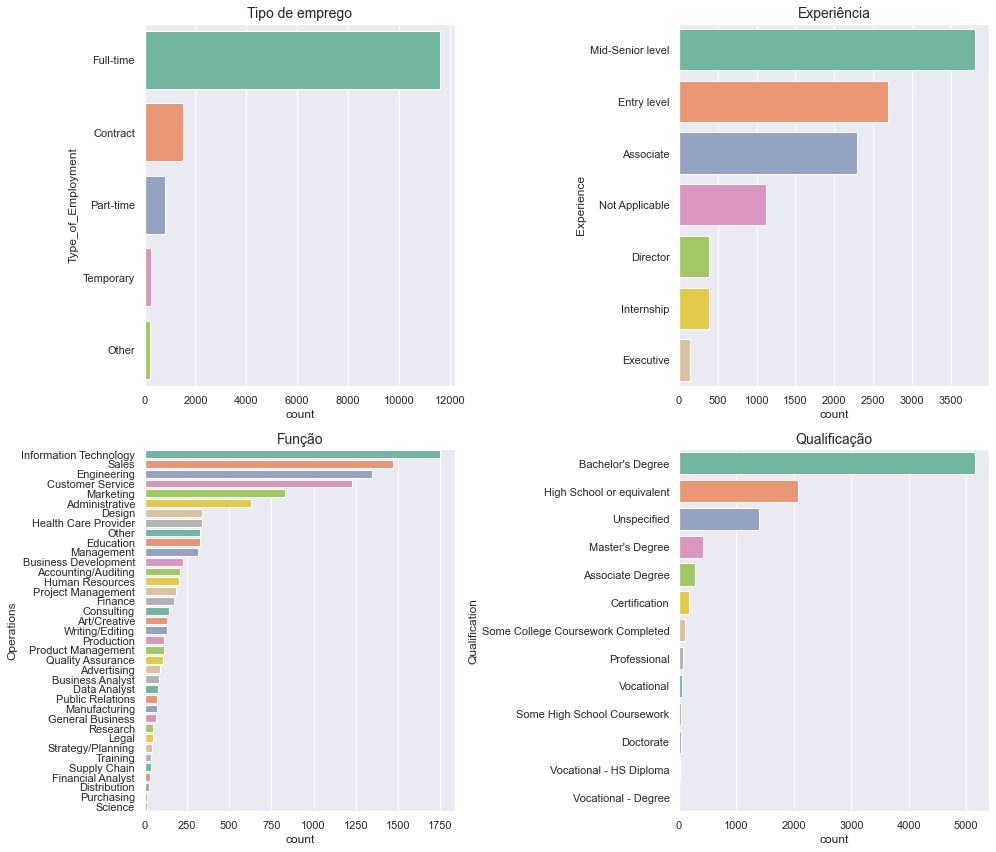

In [6]:
fig, axes = plt.subplots(2,2,figsize=(14,12))

sns.countplot(y='Type_of_Employment',data=dados, order=dados['Type_of_Employment'].value_counts().index,
              ax=axes[0][0], palette='Set2') 
axes[0][0].set_title('Tipo de emprego', fontsize=14)

sns.countplot(y='Experience',data=dados, order=dados['Experience'].value_counts().index, ax=axes[0][1], palette='Set2')
axes[0][1].set_title('Experiência', fontsize=14)

sns.countplot(y='Operations',data=dados, order=dados['Operations'].value_counts().index,
              ax=axes[1][0], palette='Set2') 
axes[1][0].set_title('Função', fontsize=14)

sns.countplot(y='Qualification',data=dados, order=dados['Qualification'].value_counts().index, 
              ax=axes[1][1], palette='Set2')
axes[1][1].set_title('Qualificação', fontsize=14)

plt.tight_layout()
plt.show()

- Selecionei as colunas ('Tyoe_of_Employment','Experience','Operations','Qualification'), para verificar quais são os valores mais frequentes em suas colunas.

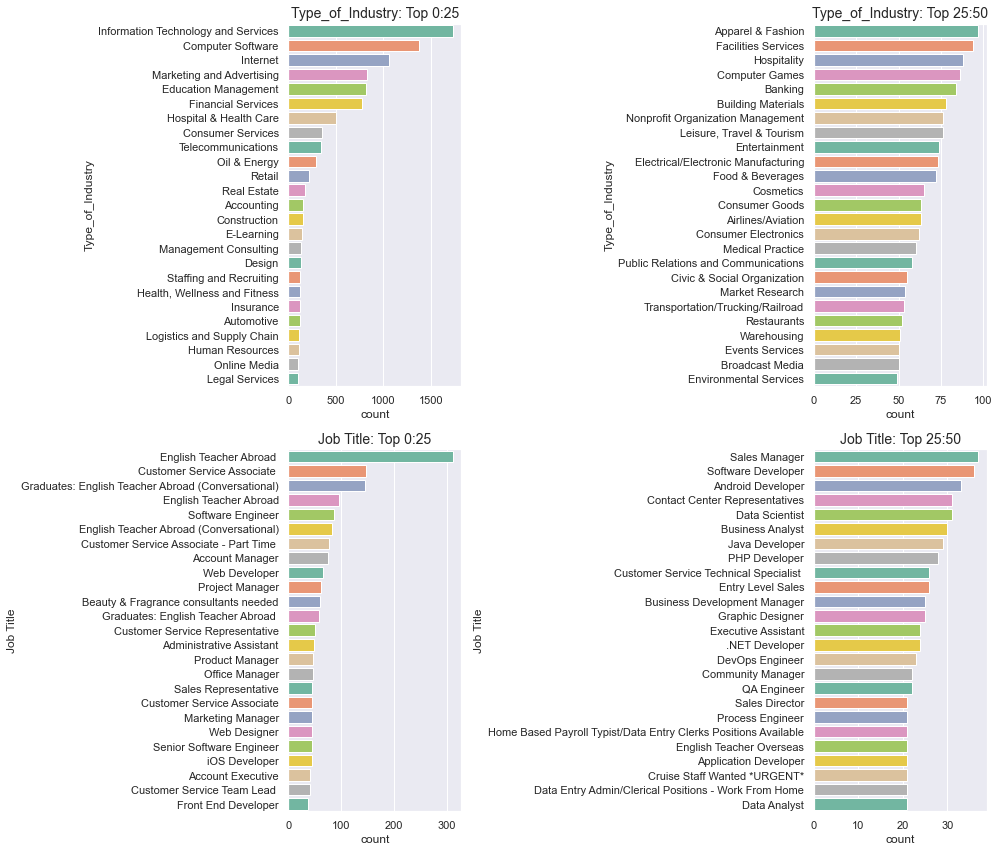

In [111]:
fig, axes = plt.subplots(2,2,figsize=(14,12))

# Plot Type of Industry
sns.countplot(y='Type_of_Industry',data=dados,
              order=dados['Type_of_Industry'].value_counts().index[0:25], ax=axes[0][0], palette='Set2') 
axes[0][0].set_title('Type_of_Industry: Top 0:25', fontsize=14)
sns.countplot(y='Type_of_Industry',data=dados,
              order=dados['Type_of_Industry'].value_counts().index[25:50], ax=axes[0][1], palette='Set2') 
axes[0][1].set_title('Type_of_Industry: Top 25:50', fontsize=14)

# Plot de Job Title
sns.countplot(y='Job Title',data=dados, 
              order=dados['Job Title'].value_counts().index[0:25], ax=axes[1][0], palette='Set2')
axes[1][0].set_title('Job Title: Top 0:25', fontsize=14)
sns.countplot(y='Job Title',data=dados, 
              order=dados['Job Title'].value_counts().index[25:50], ax=axes[1][1], palette='Set2')
axes[1][1].set_title('Job Title: Top 25:50', fontsize=14)

plt.tight_layout()
plt.show()

- Selecionei as colunas ('Type_of_Industry','Job Title), para identificar quais são os valores mais frequentes e dividi ambas em duas colunas.

## Quais são as relações de uma coluna com as outras?
- Como o dataset se trata de trabalhos 'disponíveis', e cada coluna especifica seus requisitos para tal vaga:
    - 1_ Quais são as experiências mais requistadas e de quais empresas ?
    - 2_ Quais são as qualificações mais requisitadas e de quais empresas ?
    - 3_ Quais são os tipos de contratos oferecidos nas empresas ?

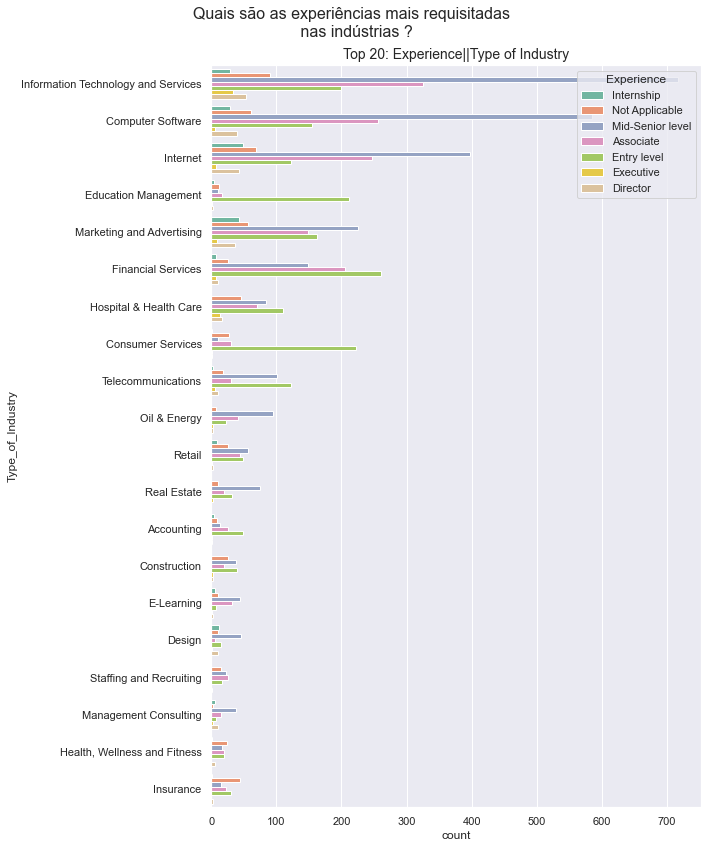

In [6]:
plt.figure(figsize=(10,12))
plt.suptitle('Quais são as experiências mais requisitadas \n nas indústrias ?', fontsize=16)
# Plot Type of Industry
sns.countplot(y='Type_of_Industry',data=dados, hue='Experience',
              order=dados['Type_of_Industry'].value_counts().index[0:20], palette='Set2') 
plt.title('Top 20: Experience||Type of Industry', fontsize=14)

plt.tight_layout()
plt.show()

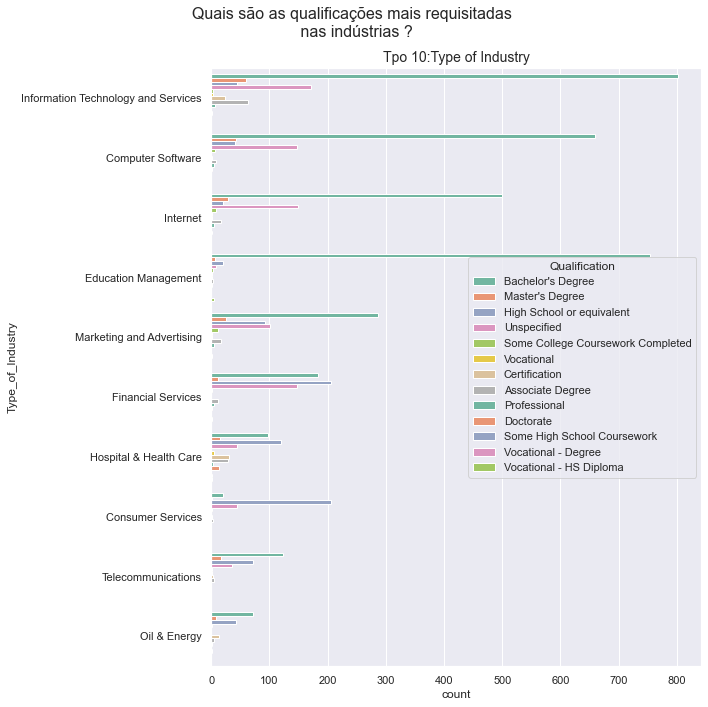

In [7]:
plt.figure(figsize=(10,10))
plt.suptitle('Quais são as qualificações mais requisitadas \n nas indústrias ?', fontsize=16)
# Plot Type of Industry
sns.countplot(y='Type_of_Industry',data=dados, hue='Qualification',
              order=dados['Type_of_Industry'].value_counts().index[0:10], palette='Set2') 
plt.title('Tpo 10:Type of Industry', fontsize=14)
plt.tight_layout()
plt.show()

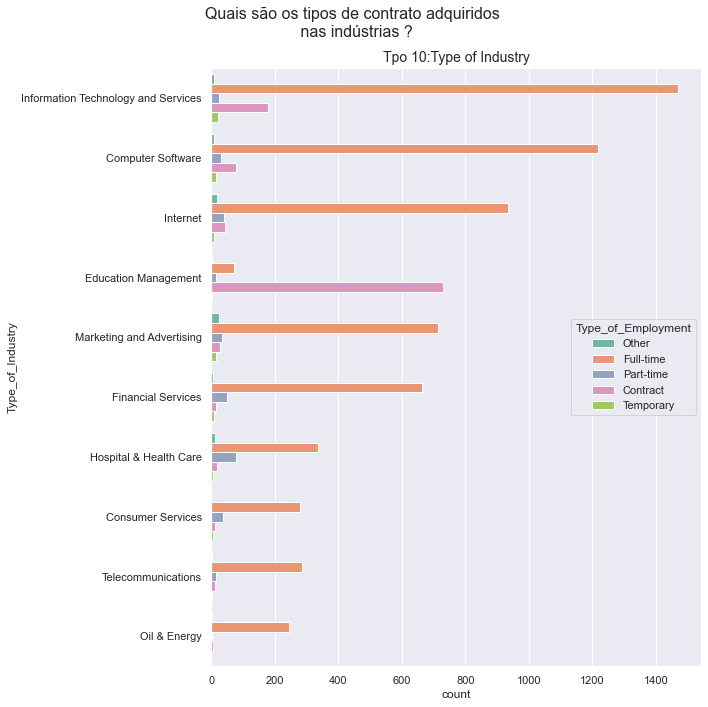

In [8]:
plt.figure(figsize=(10,10))
plt.suptitle('Quais são os tipos de contrato adquiridos \n nas indústrias ?', fontsize=16)
# Plot Type of Industry
sns.countplot(y='Type_of_Industry',data=dados, hue='Type_of_Employment',
              order=dados['Type_of_Industry'].value_counts().index[0:10], palette='Set2') 
plt.title('Tpo 10:Type of Industry', fontsize=14)
plt.tight_layout()
plt.show()

# Pré Processamento dos dados

In [72]:
import re
import string
from unicodedata import normalize
from string import punctuation
from nltk.corpus import stopwords

- Selecionei apenas as colunas textuais, onde criarei uma função de limpeza para os texto, logo depois criarei uma função para plotagem em barra, para visualizar as palavras mais frequentes das colunas. Selecionando as colunas para uma variável chamada DF.

In [83]:
df = dados[['Job Title','Job Location','Profile','Job_Description','Requirements','Job_Benefits']].copy()

In [145]:
df

,Job Title,Job Location,Profile,Job_Description,Requirements,Job_Benefits
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,"EDUCATION:Â Bachelorâs or Masterâs in GIS,...",Our culture is anything but corporateâwe hav...
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered
...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time youâve v...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...
17876,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting-Â Desire to have ...,Health &amp; WellnessMedical planPrescription ...
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN
17878,Graphic Designer,"NG, LA, Lagos",NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...


In [89]:
df.fillna('Unknown', inplace=True)

In [90]:
# função de limpeza do texto
def clear_data(text):
    text = text.strip()
    text = text.lower()
    
    # remover digitos
    text = re.sub(r'[0-9]+','',text)
    # remover ASCII
    text = normalize('NFKD', text).encode('ASCII','ignore').decode('ASCII')
    # remover pontuações
    pontuacao = string.punctuation
    text = text.translate(str.maketrans('','',pontuacao))

    stopword = set(stopwords.words('english'))
    text = ' '.join([word for word in str(text).split() if word not in stopword])

    return text

In [91]:
df['Job Title'] = df['Job Title'].apply(lambda text: clear_data(text))
df['Job Location'] = df['Job Location'].apply(lambda text: clear_data(text))
df['Profile'] = df['Profile'].apply(lambda text: clear_data(text))
df['Job_Description'] = df['Job_Description'].apply(lambda text: clear_data(text))
df['Requirements'] = df['Requirements'].apply(lambda text: clear_data(text))
df['Job_Benefits'] = df['Job_Benefits'].apply(lambda text: clear_data(text))

- Visualizando as primeiras 5 linhas das colunas do novo DF.

In [12]:
df.head()

,Job Title,Job Location,Profile,Job_Description,Requirements,Job_Benefits
0,marketing intern,us ny new york,were food and weve created a groundbreaking an...,food a fastgrowing james beard awardwinning on...,experience with content management systems a m...,unknown
1,customer service cloud video production,nz auckland,seconds the worlds cloud video production ser...,organised focused vibrant awesomedo you hav...,what we expect from youyour key responsibility...,what you will get from usthrough being part of...
2,commissioning machinery assistant cma,us ia wever,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement precommissioning and commissioning p...,unknown
3,account executive washington dc,us dc washington,our passion for improving quality of life thro...,the company esri a environmental systems resea...,educationa bacheloras or masteras in gis busin...,our culture is anything but corporateawe have ...
4,bill review manager,us fl fort worth,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualificationsrn license in the state of texas...,full benefits offered


In [52]:
# Criando as funções para o texto
## contagem de palavras
def freq_text(data):
    texto = data
    destaque = []
    d = dict()
    for text in texto:
        words = text.split(' ')
        for word in words:
            if word in d:
                d[word] += 1
            else:
                d[word] = 1
    for key in list(d.keys()):
        i = key,d[key]
        destaque.append(i)

    # criando tabela
    table = pd.DataFrame(destaque)
    table.columns = ['Words','Count']
    
    return table
    
## plotando gráfico barras frequência
def plot_bar(data, title):
    data = data.sort_values('Count', ascending=False).head(20)
    fig = px.bar(data, x='Count', y= 'Words', title=title, orientation='h',width=900, height=700, color='Words')
    return fig.show()

In [58]:
# - Selecionando as colunas e utilizando as funções criadas.
titulo = freq_text(df['Job Title'])
titulo

,Words,Count
0,marketing,748
1,intern,287
2,customer,936
3,service,859
4,,3928
...,...,...
5240,centercustomer,1
5241,depth,1
5242,sensing,1
5243,rest,1


In [63]:
plot_bar(titulo,'Título de Trabalho')

In [62]:
country = freq_text(df['Job Location'])
plot_bar(country, 'Países')

In [93]:
perfil = freq_text(df['Profile'])x
plot_bar(perfil, 'Perfil da empresa')

In [96]:
descricao = freq_text(df['Job_Description'])
plot_bar(descricao,'Descrição do Trabalho')

In [97]:
requisitos = freq_text(df['Requirements'])
plot_bar(requisitos, 'Requisitos do Trabalho')

In [99]:
beneficios = freq_text(df['Job_Benefits'])
plot_bar(beneficios, 'Beneficios do Trabalho')

## Nuvem de Palavras

In [100]:
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Odinei\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

- Agora vamos visualizar as colunas no WordCloud(Nuvem de Palavras).

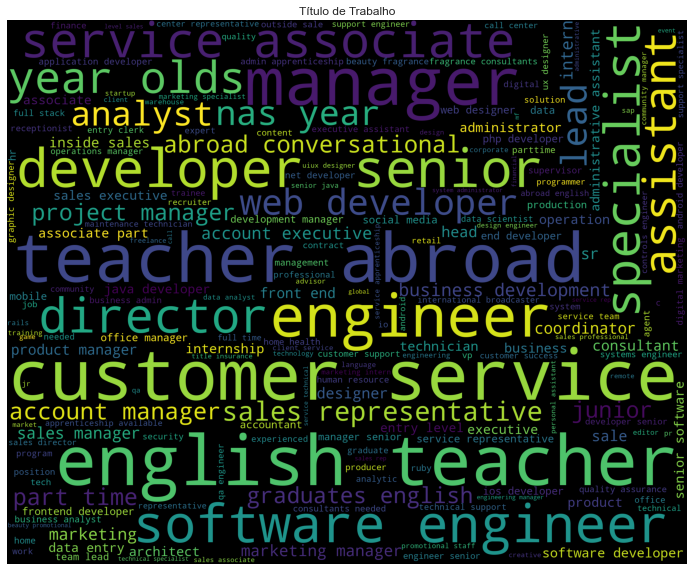

In [19]:
# Função de WordCloud
texto = df['Job Title']
def wordcloud_text(data, color, s):
    words = ' '.join(data)
    clear_data = ' '.join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = stopwords.words('english'),
                         background_color = color,
                         width=2500, height=2000).generate(clear_data)
    plt.imshow(wordcloud)
    plt.title(s)
    plt.axis('off')

plt.figure(figsize=(20,10))
    
wordcloud_text(texto, 'black', 'Título de Trabalho')

plt.show()

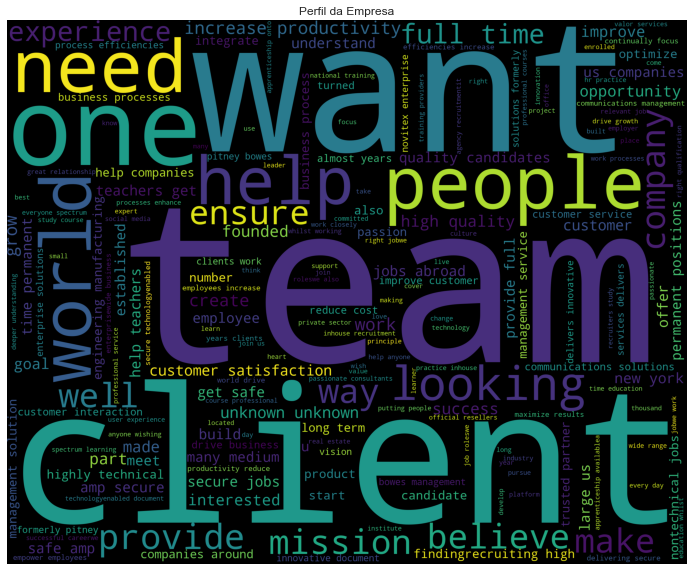

In [20]:
plt.figure(figsize=(20,10))
perfil = df['Profile']
wordcloud_text(perfil, 'black', 'Perfil da Empresa')
plt.show()

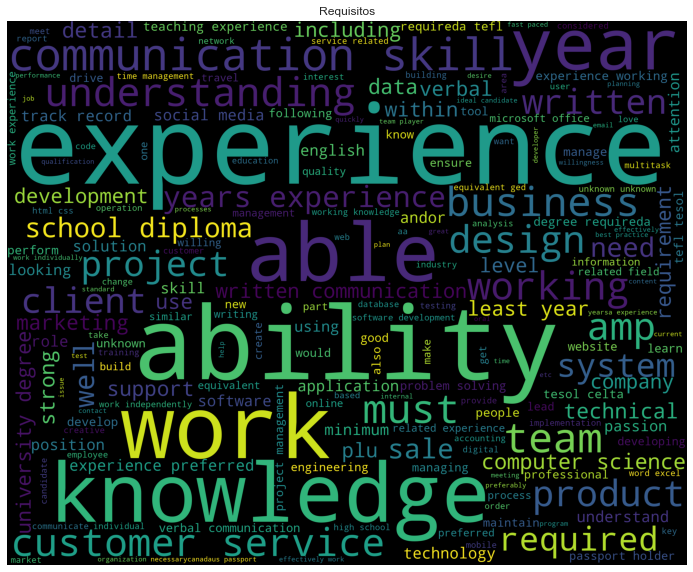

In [21]:
plt.figure(figsize=(20,10))
perfil = df['Requirements']
wordcloud_text(perfil, 'black', 'Requisitos')
plt.show()

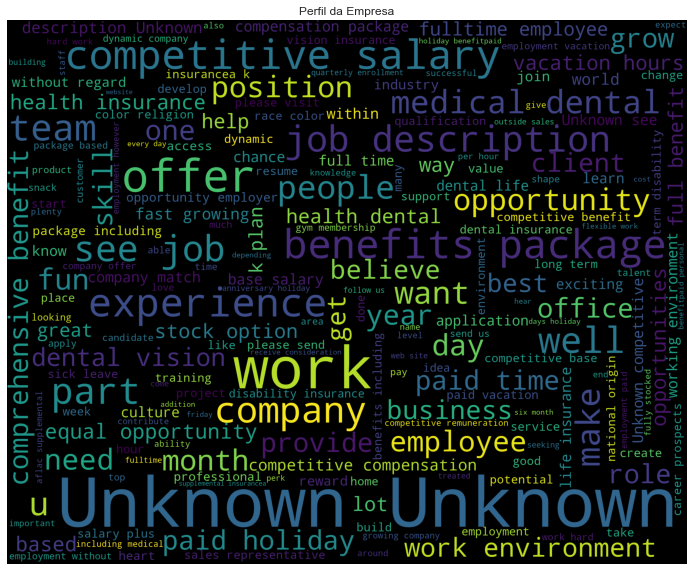

In [61]:
plt.figure(figsize=(20,10))
perfil = df['Job_Benefits']
wordcloud_text(perfil, 'black', 'Beneficios do Trabalho')
plt.show()

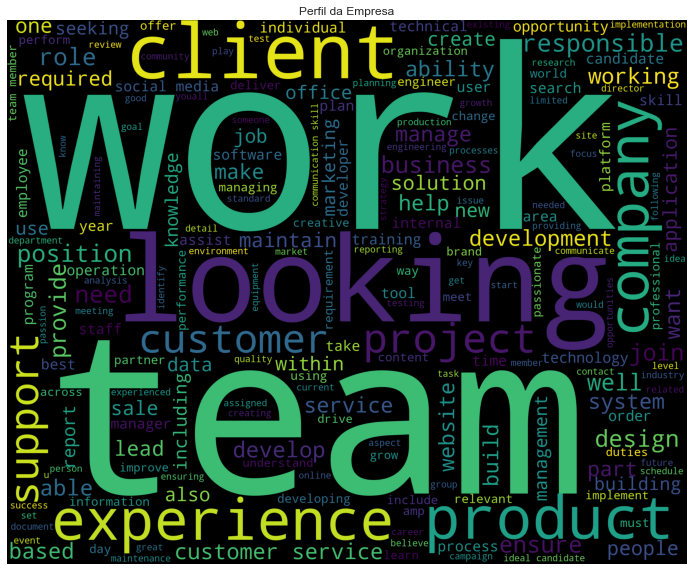

In [58]:
plt.figure(figsize=(20,10))
perfil = df['Job_Description']
wordcloud_text(perfil, 'black', 'Descrição do Trabalho')
plt.show()

 # Agradeço por ter chegado até aqui, \0/ !